# Import Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
    
parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)

In [2]:
data_oc_df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/analysed_signal.csv')
data_mb_df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/analysed_background.csv')

In [3]:
data_oc_df = data_oc_df.drop(['n_event'], axis=1)
mass_mask = (data_oc_df['mass_Lc'] > 2.24763) & ( data_oc_df['mass_Lc'] < 2.32497) & (data_oc_df['true_decay'] == 1)
data_oc_df = data_oc_df[mass_mask]
data_oc_df['tag'] = 'Sig'

data_mb_df = data_mb_df.drop(['n_event'], axis=1)
mass_mask = (data_mb_df['mass_Lc'] > 2.24763) & ( data_mb_df['mass_Lc'] < 2.32497)
data_mb_df = data_mb_df[mass_mask]
data_mb_df['tag'] = 'Bg'

raw_df = pd.concat([data_oc_df, data_mb_df], axis=0).reset_index(drop=True)

raw_df['cosAngle_r_Lc_momentum_Lc'] = raw_df['cosAngle_r_Lc_momentum_Lc'].apply(np.cos)
raw_df['cosAngle_r_Lc_sum_momentum'] = raw_df['cosAngle_r_Lc_sum_momentum'].apply(np.cos)
raw_df['cosAngle_momentum_Lc_sum_momentum'] = raw_df['cosAngle_momentum_Lc_sum_momentum'].apply(np.cos)

raw_df['cosAngle_r_Lc_momentum_Lc_left'] = raw_df.loc[raw_df['cosAngle_r_Lc_momentum_Lc'] < 0, 'cosAngle_r_Lc_momentum_Lc']
raw_df['cosAngle_r_Lc_momentum_Lc_right'] = raw_df.loc[raw_df['cosAngle_r_Lc_momentum_Lc'] > 0, 'cosAngle_r_Lc_momentum_Lc']

raw_df['cosAngle_r_Lc_sum_momentum_left'] = raw_df.loc[raw_df['cosAngle_r_Lc_sum_momentum'] < 0, 'cosAngle_r_Lc_sum_momentum']
raw_df['cosAngle_r_Lc_sum_momentum_right'] = raw_df.loc[raw_df['cosAngle_r_Lc_sum_momentum'] > 0, 'cosAngle_r_Lc_sum_momentum']

In [4]:
from analysis_scripts.selection_scripts import auto_preselection


proc_df = raw_df.copy()

feature_to_remove = ['mass_Lc', 'cosAngle_r_Lc_momentum_Lc', 'cosAngle_r_Lc_sum_momentum',
                     'phi_angle', 'multiplicity', 'Lc_diff_x', 'Lc_diff_y', 'Lc_diff_z',
                     'PV_diff_x', 'PV_diff_y', 'PV_diff_z', 'PV_diff_ES_x', 'PV_diff_ES_y',
                     'PV_diff_ES_z', 'true_decay', 'tag']

features_to_select = list(proc_df.columns)

for feature in feature_to_remove:
    features_to_select.remove(feature)

selection_df, mask = auto_preselection(
    df=proc_df,
    features=features_to_select,
    safety_interval=0.9,
    indent=2,
    quantile_left=1e-2,
    quantile_right=1-1e-2,
    recursive=True
)

proc_df = proc_df.query(mask)

# Test

In [5]:
from analysis_scripts.selection_scripts import calculate_rates_at_cut_point
from analysis_scripts.selection_scripts import find_optimal_cut_point
from analysis_scripts.selection_scripts import calculate_feature_importance
from analysis_scripts.selection_scripts import create_best_selection_path


"""res = calculate_rates_at_cut_point(
    df=proc_df[['mass_Lc', 'tag', 'Pt_p']],
    feature='Pt_p',
    bounds=None,
    x_cut=1.5,
    selection_direction='right',
    mass_interval=(2.24763, 2.32497)
)"""

"""find_optimal_cut_point(
    df=proc_df[['mass_Lc', 'tag', 'Pt_p']],
    feature='Pt_p',
    nbins=1000,
    select_direction='right',
    bounds=None, 
    min_sig_sel=0.3,
    metric_type='tpr_fpr',
    mass_interval=(2.24763, 2.32497)
)"""

search_columns = [
    'length_Lc', 'dLength_Lc'
]

"""calculate_feature_importance(
    df=proc_df,
    features=search_columns,
    direction_restrictions={'length_Lc': 'right', 'dLength_Lc': 'right', 'lengthXY_Lc': 'right', 'dLengthXY_Lc': 'right'},
    metric_type='tpr_fpr',
    mass_interval=(2.24763, 2.32497)
)"""

create_best_selection_path(
    df=proc_df,
    features=search_columns,
    n_features_to_use=None, 
    metric_type='tpr_fpr', 
    have_sig_events=2.1555 * 1e6,
    have_bg_events=39.2 * 1e6, 
    mass_interval=(2.24763, 2.32497),
    direction_restrictions={'length_Lc': 'right', 'dLength_Lc': 'right', 'lengthXY_Lc': 'right', 'dLengthXY_Lc': 'right'}
)

Selection Progress: 1/2
Remaining features: 2
Remaining events - Signal: 70065, Background: 99098
****************************************
Progress: 1/2
Process feature: length_Lc
Direction restriction encounter. Skip direction: left
Cut point search progress: 0/1000
Cut point search progress: 200/1000
Cut point search progress: 400/1000
Cut point search progress: 600/1000
Cut point search progress: 800/1000
AUC value: 0.6102, direction: right
****************************************
Progress: 2/2
Process feature: dLength_Lc
Direction restriction encounter. Skip direction: left
Cut point search progress: 0/1000
Cut point search progress: 200/1000
Cut point search progress: 400/1000
Cut point search progress: 600/1000
Cut point search progress: 800/1000
AUC value: 0.3160, direction: right
Selected feature: length_Lc, Direction: right, Cut: -0.0001
Selection Progress: 2/2
Remaining features: 1
Remaining events - Signal: 47123, Background: 50374
****************************************
Pr

,selected_feature,cut_point,select_direction,signal_efficiency,background_efficiency,ratio,overall_s_sqrt_s_b,total_sig_unscaled,total_bg_unscaled
0,length_Lc,-0.000055,right,0.672561,0.508325,0.000063,24.595216,47123,50374
1,dLength_Lc,0.006801,right,0.999979,1.000000,0.000063,24.594695,47122,50374


Cut point search progress: 0/1000
Cut point search progress: 200/1000
Cut point search progress: 400/1000
Cut point search progress: 600/1000
Cut point search progress: 800/1000
[0.00000000e+00 5.70898451e-05 1.42724613e-04 2.85449226e-04
 4.99536145e-04 8.42075216e-04 1.37015628e-03 2.11232427e-03
 2.55477057e-03 3.41111825e-03 4.12474131e-03 5.09526868e-03
 6.49396989e-03 7.90694355e-03 9.99072290e-03 1.17176907e-02
 1.35445658e-02 1.54998930e-02 1.77406694e-02 1.98387212e-02
 2.21794048e-02 2.46485406e-02 2.72461286e-02 2.97152644e-02
 3.28266610e-02 3.61806894e-02 3.93919931e-02 4.30742882e-02
 4.66281310e-02 5.01106116e-02 5.35788197e-02 5.73039321e-02
 6.09719546e-02 6.44687076e-02 6.84792692e-02 7.29465496e-02
 7.70712909e-02 8.12959395e-02 8.56490402e-02 9.04017698e-02
 9.50974095e-02 9.92506958e-02 1.03846428e-01 1.08599158e-01
 1.14293870e-01 1.19146507e-01 1.23813602e-01 1.28666238e-01
 1.34046956e-01 1.38614144e-01 1.43994862e-01 1.49304218e-01
 1.54271034e-01 1.59451937e-0

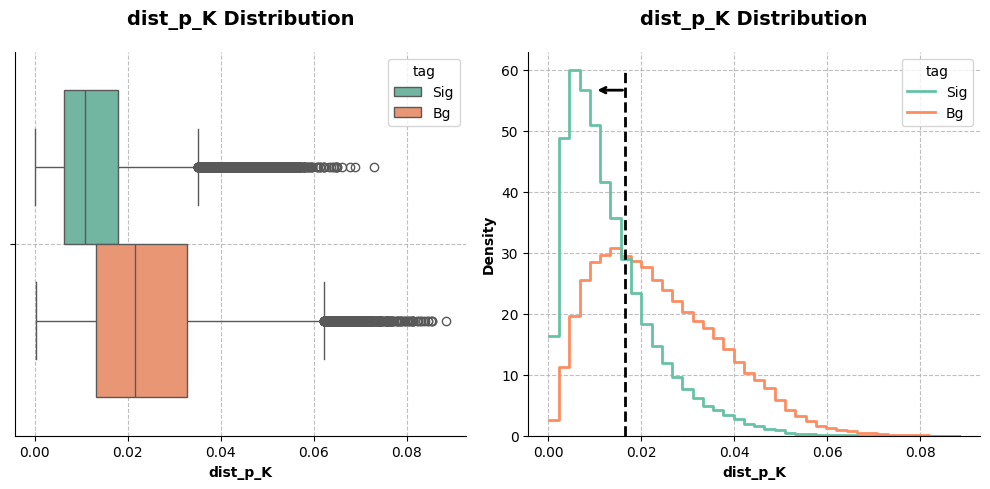

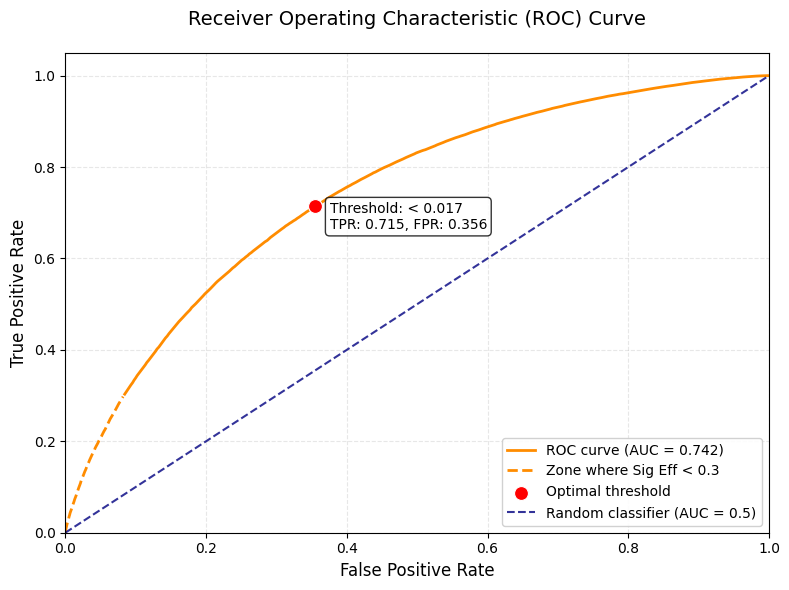

In [ ]:
from analysis_scripts.draw_scripts import draw_feature_distribution
from analysis_scripts.draw_scripts import draw_roc
from analysis_scripts.selection_scripts import find_optimal_cut_point


feature = 'dist_p_K'
select_direction = 'left'
metric_type = 'tpr_fpr'
bounds = None
min_sig_sel = 0.3

num_sig_before_sel = proc_df.loc[proc_df['tag'] == 'Sig', 'mass_Lc'].count()
num_bg_before_sel = proc_df.loc[proc_df['tag'] == 'Bg', 'mass_Lc'].count()

min_sig_sel_mask, best_arg, metric, thresholds, tpr, fpr, sig_efficiency, bg_efficiency = find_optimal_cut_point(
    df=proc_df[['mass_Lc', 'tag', feature]],
    feature=feature,
    bounds=bounds,
    select_direction=select_direction,
    metric_type=metric_type,
    min_sig_sel=min_sig_sel,
    mass_interval=(2.24763, 2.32497)
)

if bounds is not None:
    bounds_mask = (proc_df[feature] >= bounds[0]) & (proc_df[feature] <= bounds[1])
    proc_df = proc_df[bounds_mask]
    
best_cut_x = thresholds[min_sig_sel_mask][best_arg]
best_metric = metric[min_sig_sel_mask][best_arg]
best_tpr = tpr[min_sig_sel_mask][best_arg]
best_fpr = fpr[min_sig_sel_mask][best_arg]

draw_feature_distribution(
    df=proc_df,
    distr_name=feature,
    tag=None,
    hue='tag',
    bins=40,
    norma=True,
    cut_point=best_cut_x,
    select_direction=select_direction
)

_ = draw_roc(
        tpr=tpr,
        fpr=fpr,
        best_cut_x=best_cut_x,
        best_tpr=best_tpr,
        best_fpr=best_fpr,
        select_direction=select_direction,
        mask=min_sig_sel_mask,
        min_sig_sel=min_sig_sel
    )

if select_direction == 'right':
    proc_df = proc_df[proc_df[feature] > best_cut_x]
else:
    proc_df = proc_df[proc_df[feature] < best_cut_x]

print(f'Cut point: {best_cut_x}')

sig_eff = proc_df.loc[proc_df['tag'] == 'Sig', 'mass_Lc'].count() / num_sig_before_sel
bg_eff = proc_df.loc[proc_df['tag'] == 'Bg', 'mass_Lc'].count() / num_bg_before_sel

Cut point search progress: 0/1000
Cut point search progress: 200/1000
Cut point search progress: 400/1000
Cut point search progress: 600/1000
Cut point search progress: 800/1000
[0.00000000e+00 5.70898451e-05 1.42724613e-04 2.85449226e-04
 4.99536145e-04 8.42075216e-04 1.37015628e-03 2.11232427e-03
 2.55477057e-03 3.41111825e-03 4.12474131e-03 5.09526868e-03
 6.49396989e-03 7.90694355e-03 9.99072290e-03 1.17176907e-02
 1.35445658e-02 1.54998930e-02 1.77406694e-02 1.98387212e-02
 2.21794048e-02 2.46485406e-02 2.72461286e-02 2.97152644e-02
 3.28266610e-02 3.61806894e-02 3.93919931e-02 4.30742882e-02
 4.66281310e-02 5.01106116e-02 5.35788197e-02 5.73039321e-02
 6.09719546e-02 6.44687076e-02 6.84792692e-02 7.29465496e-02
 7.70712909e-02 8.12959395e-02 8.56490402e-02 9.04017698e-02
 9.50974095e-02 9.92506958e-02 1.03846428e-01 1.08599158e-01
 1.14293870e-01 1.19146507e-01 1.23813602e-01 1.28666238e-01
 1.34046956e-01 1.38614144e-01 1.43994862e-01 1.49304218e-01
 1.54271034e-01 1.59451937e-0

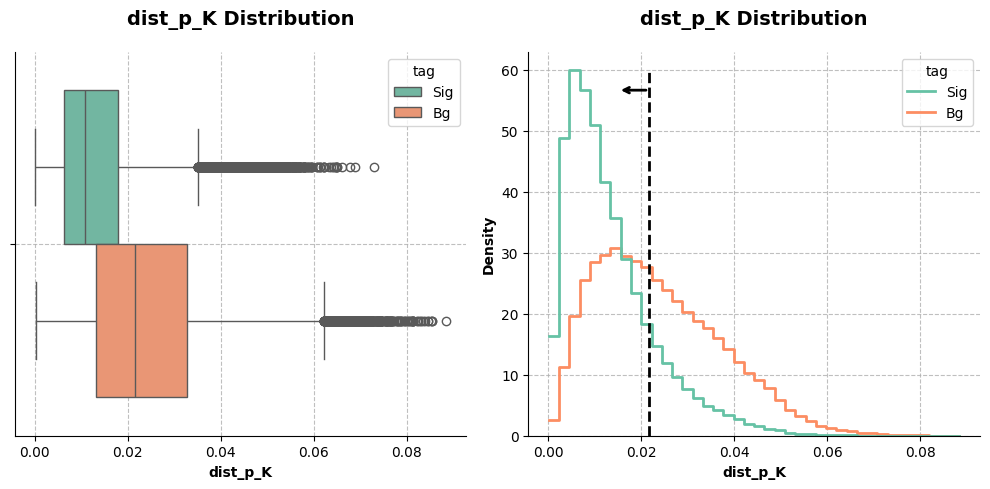

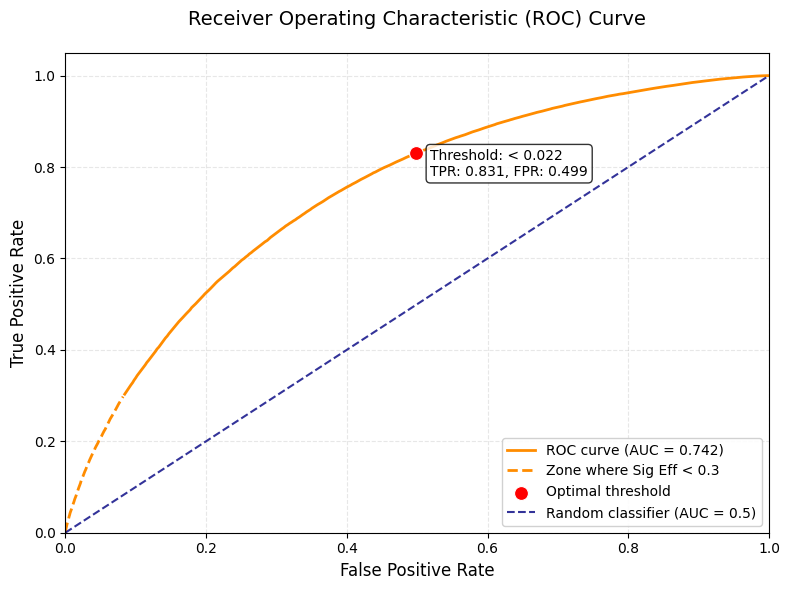

In [5]:
from analysis_scripts.draw_scripts import draw_feature_distribution
from analysis_scripts.draw_scripts import draw_roc
from analysis_scripts.selection_scripts import find_optimal_cut_point


feature = 'dist_p_K'
select_direction = 'left'
metric_type = 'f1'
bounds = None
min_sig_sel = 0.3

num_sig_before_sel = proc_df.loc[proc_df['tag'] == 'Sig', 'mass_Lc'].count()
num_bg_before_sel = proc_df.loc[proc_df['tag'] == 'Bg', 'mass_Lc'].count()

min_sig_sel_mask, best_arg, metric, thresholds, tpr, fpr, sig_efficiency, bg_efficiency = find_optimal_cut_point(
    df=proc_df[['mass_Lc', 'tag', feature]],
    feature=feature,
    bounds=bounds,
    select_direction=select_direction,
    metric_type=metric_type,
    min_sig_sel=min_sig_sel,
    mass_interval=(2.24763, 2.32497)
)

if bounds is not None:
    bounds_mask = (proc_df[feature] >= bounds[0]) & (proc_df[feature] <= bounds[1])
    proc_df = proc_df[bounds_mask]
    
best_cut_x = thresholds[min_sig_sel_mask][best_arg]
best_metric = metric[min_sig_sel_mask][best_arg]
print(tpr)
best_tpr = tpr[min_sig_sel_mask][best_arg]
best_fpr = fpr[min_sig_sel_mask][best_arg]

draw_feature_distribution(
    df=proc_df,
    distr_name=feature,
    tag=None,
    hue='tag',
    bins=40,
    norma=True,
    cut_point=best_cut_x,
    select_direction=select_direction
)

_ = draw_roc(
        tpr=tpr,
        fpr=fpr,
        best_cut_x=best_cut_x,
        best_tpr=best_tpr,
        best_fpr=best_fpr,
        select_direction=select_direction,
        mask=min_sig_sel_mask,
        min_sig_sel=min_sig_sel
    )

if select_direction == 'right':
    proc_df = proc_df[proc_df[feature] > best_cut_x]
else:
    proc_df = proc_df[proc_df[feature] < best_cut_x]

print(f'Cut point: {best_cut_x}')

sig_eff = proc_df.loc[proc_df['tag'] == 'Sig', 'mass_Lc'].count() / num_sig_before_sel
bg_eff = proc_df.loc[proc_df['tag'] == 'Bg', 'mass_Lc'].count() / num_bg_before_sel